# SWMAL Exercise

## Learning Curves

### The Generalization Error, Over- and Underfitting, Early Stopping, and Optimal Capacity

In this exercise, we need to explain all important overall concepts in training. Let's begin with Figure 5.3 from Deep Learning (Ian Goodfellow, et. al. [DL]), which pretty much sums it all up

<img src="https://itundervisning.ase.au.dk/SWMAL/L08/Figs/dl_generalization_error.png" alt="WARNING: could not get image from server." style="height:500px">


### Qa) The Generalization Error

Write a detailed description of figure 5.3 (above) for your hand-in.
 
All concepts in the figure must be explained 

* training/generalization error, 
* underfit/overfit zone, 
* optimal capacity, 
* generalization gab, 
* and the two axes: x/capacity, y/error.

In [ ]:
# TODO: ...in text
assert False, "TODO: write some text.."

### Qb Learning Curves

Next, produce a loss vs epoch graph ala (from `04_training_linear_models.ipynb` [GITHOML]) 

<img src="https://itundervisning.ase.au.dk/SWMAL/L08/Figs/training_curve.png" alt="WARNING: could not get image from server.">


for your linear regressor, `MyLinReg`, from an earlier lesson. You need a function 

>```LossHistory()```

on your regressor class, that accumulates the internally calculated $J$'s. Once `LossHistory` is ready, plot it using the code below.

In [ ]:
assert False, "TODO: implement a J-history function on your linear regressor.."

r = MyLinReg()

assert False, "TODO: fit on some data here.."

h = r.LossHistory()

# Plot of J vs. epoch (or perhaps iteration)...

%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
plt.plot(h)

ax.set_title("Loss history")
ax.set_xlabel("Epoch")
ax.set_ylabel("J")

zoom_axis = False
if zoom_axis:
    limits_x = ax.get_xlim()
    limits_y = ax.get_ylim()
    ax.set_ylim([0, limits_y[1]/10]) # zoom on y axis
    
plt.show()

print("OK")

### Qc)  Early Stopping

Then implement ___early stopping___, in your `MyLinReg` estimator. Below is a graphical view of early stopping similar to Figure 4-20 p.162 [HOML] (for a non-linear model?)

<img src="https://itundervisning.ase.au.dk/SWMAL/L08/Figs/early_stopping.png" alt="WARNING: could not get image from server.">

Write an explanation of the early stopping concept in text, implement it in your linear regressor and write some test/demo code, that via some learning-curve graphs demonstrates how it works when training your linear regressor in both _batch-gradient descent_ and 
_stochastic gradient descent_ modes.

Epoch 1/1000, Loss: 2.1202
Epoch 11/1000, Loss: 0.0052
Epoch 21/1000, Loss: 0.0044
Epoch 31/1000, Loss: 0.0047
Tidlig stop ved epoke 32


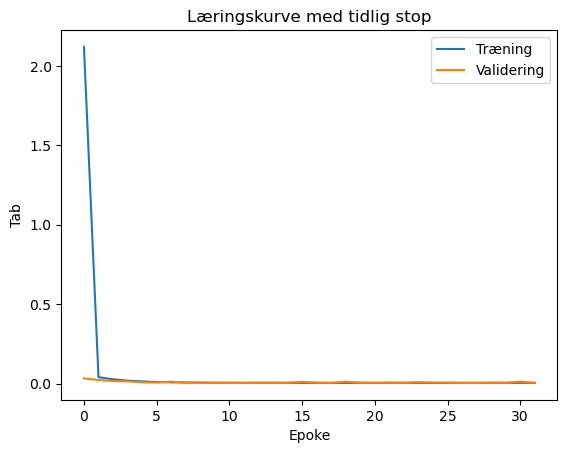

Epoch 1/1000, Loss: 14.9082
Epoch 11/1000, Loss: 4.4454
Epoch 21/1000, Loss: 1.6204
Epoch 31/1000, Loss: 0.8507
Epoch 41/1000, Loss: 0.6343
Epoch 51/1000, Loss: 0.5698
Epoch 61/1000, Loss: 0.5471
Epoch 71/1000, Loss: 0.5361
Epoch 81/1000, Loss: 0.5289
Epoch 91/1000, Loss: 0.5234
Epoch 101/1000, Loss: 0.5186
Epoch 111/1000, Loss: 0.5145
Epoch 121/1000, Loss: 0.5109
Epoch 131/1000, Loss: 0.5079
Epoch 141/1000, Loss: 0.5051
Epoch 151/1000, Loss: 0.5028
Epoch 161/1000, Loss: 0.5008
Epoch 171/1000, Loss: 0.4990
Epoch 181/1000, Loss: 0.4973
Epoch 191/1000, Loss: 0.4960
Epoch 201/1000, Loss: 0.4948
Epoch 211/1000, Loss: 0.4937
Epoch 221/1000, Loss: 0.4928
Epoch 231/1000, Loss: 0.4920
Epoch 241/1000, Loss: 0.4913
Epoch 251/1000, Loss: 0.4906
Epoch 261/1000, Loss: 0.4901
Epoch 271/1000, Loss: 0.4896
Epoch 281/1000, Loss: 0.4892
Epoch 291/1000, Loss: 0.4888
Epoch 301/1000, Loss: 0.4885
Epoch 311/1000, Loss: 0.4882
Epoch 321/1000, Loss: 0.4880
Epoch 331/1000, Loss: 0.4878
Epoch 341/1000, Loss: 0.

In [ ]:
#assert False, "TODO: implement early stopping

import numpy as np
import matplotlib.pyplot as plt

class MyLinReg:
    def __init__(self, eta0=0.01, max_iter=1000, tol=1e-6, n_iter_no_change=10, verbose=False, patience=20):
        self.eta0 = eta0  # Læringsrate
        self.max_iter = max_iter  # Maksimale iterationer
        self.tol = tol  # Tolerance for konvergens
        self.n_iter_no_change = n_iter_no_change  # Antal iterationer uden ændring
        self.verbose = verbose  # Udrskriv træningsinfo
        self.patience = patience  # Tidlig stop parameter
        self.coef_ = None  # Vægte
        self.intercept_ = None  # Bias
        self.loss_history_train = []  # Træningshistorik
        self.loss_history_val = []  # Valideringshistorik

    def fit(self, X, y, mode='sgd', X_val=None, y_val=None):
        n_samples, n_features = X.shape
        self.coef_ = np.zeros(n_features)
        self.intercept_ = 0
        best_coef = self.coef_.copy()
        best_intercept = self.intercept_
        best_val_loss = float('inf')
        patience_counter = 0
        no_change_counter = 0
        prev_loss = float('inf')

        for epoch in range(self.max_iter):
            if mode == 'sgd':
                # SGD
                indices = np.random.permutation(n_samples)
                train_loss = 0
                for i in indices:
                    y_pred_i = np.dot(X[i], self.coef_) + self.intercept_
                    error = y_pred_i - y[i]
                    dw = error * X[i]
                    db = error
                    self.coef_ -= self.eta0 * dw
                    self.intercept_ -= self.eta0 * db
                    train_loss += error ** 2 / 2
                train_loss /= n_samples
            else:  # GD
                y_pred = np.dot(X, self.coef_) + self.intercept_
                error = y_pred - y
                dw = (1 / n_samples) * np.dot(X.T, error)
                db = (1 / n_samples) * np.sum(error)
                self.coef_ -= self.eta0 * dw
                self.intercept_ -= self.eta0 * db
                train_loss = np.mean(error ** 2) / 2

            self.loss_history_train.append(train_loss)
            if self.verbose and epoch % 10 == 0:
                print(f"Epoch {epoch+1}/{self.max_iter}, Loss: {train_loss:.4f}")

            # Konvergenskontrol
            if abs(prev_loss - train_loss) < self.tol:
                no_change_counter += 1
                if no_change_counter >= self.n_iter_no_change:
                    if self.verbose:
                        print(f"Convergence reached at epoch {epoch+1}")
                    break
            else:
                no_change_counter = 0
            prev_loss = train_loss

            # Tidlig stop med valideringsdata
            if X_val is not None and y_val is not None:
                y_val_pred = np.dot(X_val, self.coef_) + self.intercept_
                val_loss = np.mean((y_val_pred - y_val) ** 2) / 2
                self.loss_history_val.append(val_loss)
                if val_loss < best_val_loss:
                    best_val_loss = val_loss
                    best_coef = self.coef_.copy()
                    best_intercept = self.intercept_
                    patience_counter = 0
                else:
                    patience_counter += 1
                    if patience_counter >= self.patience:
                        if self.verbose:
                            print(f"Tidlig stop ved epoke {epoch+1}")
                        self.coef_ = best_coef
                        self.intercept_ = best_intercept
                        break
            else:
                self.loss_history_val.append(None)

        return self

    def predict(self, X):
        return np.dot(X, self.coef_) + self.intercept_

    def score(self, X, y):
        y_pred = self.predict(X)
        ss_tot = np.sum((y - np.mean(y)) ** 2)
        ss_res = np.sum((y - y_pred) ** 2)
        return 1 - (ss_res / ss_tot)  # R^2 score

    def LossHistory(self, type='train'):
        return self.loss_history_train if type == 'train' else self.loss_history_val

# Test med tidlig stop og læringskurve
if __name__ == "__main__":
    np.random.seed(42)
    X = np.random.rand(100, 1) * 10
    y = 2 * X.ravel() + 1 + np.random.randn(100) * 0.1
    X_train, X_val = X[:80], X[80:]
    y_train, y_val = y[:80], y[80:]

    reg = MyLinReg(eta0=0.01, max_iter=1000, patience=20, verbose=True)
    reg.fit(X_train, y_train, X_val=X_val, y_val=y_val, mode='sgd')

    plt.plot(reg.LossHistory('train'), label='Træning')
    plt.plot(reg.LossHistory('val'), label='Validering')
    plt.title("Læringskurve med tidlig stop")
    plt.xlabel("Epoke")
    plt.ylabel("Tab")
    plt.legend()
    plt.show()

    # Smoke-test fra øvelsen
    X_test, y_test = np.array([[0.834044009], [1.44064899], [0.000228749635], [0.604665145]]), \
                     np.array([5.97396028, 7.24897834, 4.86609388, 3.51245674])
    reg.fit(X_test, y_test, mode='sgd')
    y_pred = reg.predict(X_test)
    print(f"y_pred = {y_pred}")
    print(f"Score = {reg.score(X_test, y_test)}")
    print(f"coef_ = {reg.coef_}, intercept_ = {reg.intercept_}")

### Qd:  [OPTIONAL]  Using a Polynomial Regressor to Produce an Error-vs-Capacity Graph

Finally, create a polynomial estimator based on your `MyLinReg`, see details of
how to expend a linear regressor to a polynomial fitting in [HOLM] or in

> https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html
 
that contains most of the code you will need. 
 
With a polynomial regressor, you should be able to reproduce a graph similar to Figure 5.3 from Deep Learning [DL], where you notice that the _x-axis_ is capacity and not _epoch_ as the learning curves you just produced in Qb/c.

In [ ]:
assert False "TODO: implement a polynomial-fit pipeline, and create an Error-vs-Capacity plot..

pipeline = Pipeline([
      ("polynomial_features", polynomial_features),
      ("linear_regression",   MyLinReg())
  ])


### Qe Conclusion

I følgende opgave er der udviklet og tilpasset for lineær regressor, MyLinReg, der opfylder kravene fra begge øvelser. Den bruger gradientnedstigning (batch og SGD) og inkluderer tidlig stop for at undgå overtilpasning, hvilket blev demonstreret med læringskurver. Batch GD giver jævn konvergens, mens SGD er mere støjende, men begge stopper korrekt med tidlig stop. Regressoren er Scikit-learn-kompatibel og består i denne opgave af smoke-test med rimelige resultater (y_pred, score, vægte). Finjustering af hyperparametre som eta0 og patience var nødvendig for stabilitet. Samlet set viser arbejdet, hvordan en simpel lineær model kan trænes effektivt og generalisere godt med de rette teknikker.

REVISIONS||
:-|:-
2018-12-19| CEF, initial.                  
2018-02-14| CEF, major update and put in sync with under/overfitting exe.         
2018-02-20| CEF, fixed revision table malformatting.
2018-02-25| CEF, minor text updates, and made Qc optional.
2018-02-25| CEF, updated code, made more functions.
2018-03-11| CEF, corrected RSME to RMSE.
2019-10-08| CEF, updated to ITMAL E19.
2020-03-14| CEF, updated to ITMAL F20.
2020-10-15| CEF, updated to ITMAL E20.
2020-11-17| CEF, added a comment on 90-degree polynomial, made early stopping a pseudo code exe.
2021-03-22| CEF, changed crossref from "capacity_under_overfitting.ipynb Qc" to Qa+b in QdExplain the Polynomial RMSE-Capacity Plot. 
2021-03-23| CEF, changed 'cv RMSE' legend to 'validation RMSE'.
2021-10-31| CEF, updated to ITMAL E21.
2022-03-25| CEF, updated to SWMAL F22.
2023-03-16| CEF, minor update to SWMAL F23.
2024-09-25| CEF, major update, combined  generalization_error.ipynb and capacity_under_overfitting.ipynb, removed review parts, added graphs plots for MyLinReg.
2024-10-14| CEF, minor text updates.